In [8]:
#question 1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# Define column names
column_names = ['User ID', 'Stream ID', 'Streamer username', 'Time start', 'Time stop']
# Read the data
data = pd.read_csv('../100k_a.csv',names=column_names) ## this data doesnt exist in github repo so put your own path

In [11]:

# Display a sample of the first few rows of the data
print(data.head())

   User ID    Stream ID Streamer username  Time start  Time stop
0        1  33842865744          mithrain         154        156
1        1  33846768288             alptv         166        169
2        1  33886469056          mithrain         587        588
3        1  33887624992              wtcn         589        591
4        1  33890145056         jrokezftw         591        594


In [12]:
# Display basic statistics
data_without_stream_id = data.drop('Stream ID', axis=1)
print(data_without_stream_id.describe())



            User ID    Time start     Time stop
count  3.051733e+06  3.051733e+06  3.051733e+06
mean   5.032313e+04  3.146044e+03  3.149186e+03
std    2.889476e+04  1.772520e+03  1.772656e+03
min    1.000000e+00  0.000000e+00  1.000000e+00
25%    2.528400e+04  1.618000e+03  1.620000e+03
50%    5.029900e+04  3.174000e+03  3.178000e+03
75%    7.545200e+04  4.676000e+03  4.679000e+03
max    1.000000e+05  6.147000e+03  6.148000e+03


C:\Users\naser\AppData\Local\Temp\ipykernel_22412\3998459620.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


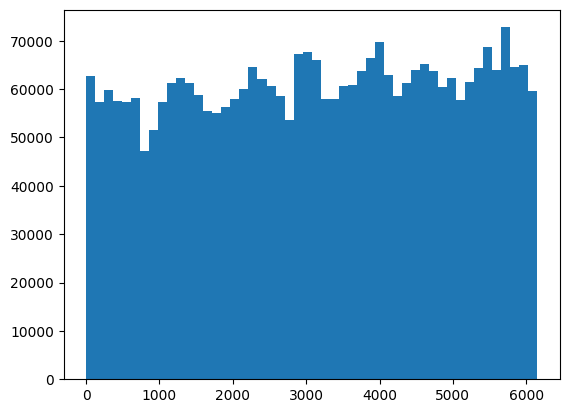

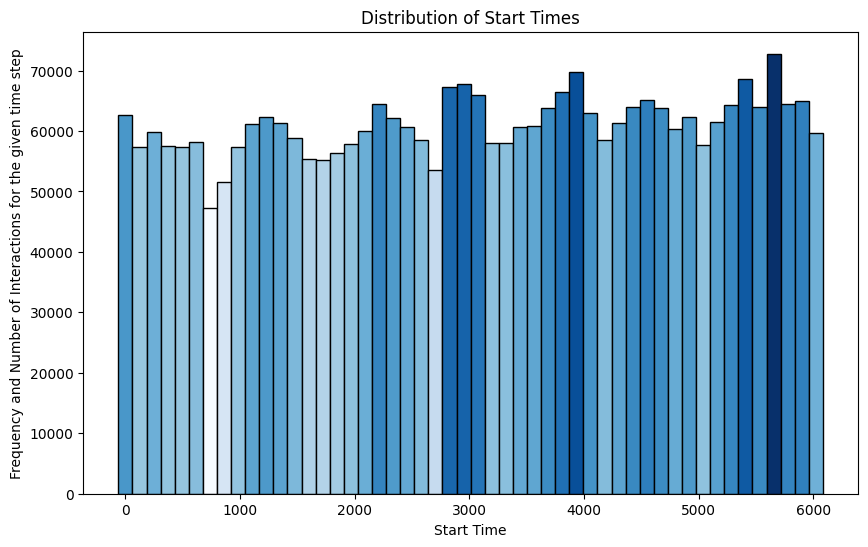

In [13]:
# Calculate histogram
counts, bins, _ = plt.hist(data['Time start'], bins=50)

# Get colormap
cmap = cm.get_cmap('Blues')

# Normalize counts to range [0, 1] for colormap
norm = plt.Normalize(counts.min(), counts.max())

# Plot histogram with color intensity corresponding to bar height
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], counts, width=np.diff(bins), color=cmap(norm(counts)), edgecolor='black')
plt.title('Distribution of Start Times')
plt.xlabel('Start Time')
plt.ylabel('Frequency and Number of Interactions for the given time step')
plt.show()

In [14]:
 #Calculate basic statistics
num_users = data['User ID'].nunique()
num_streamers = data['Streamer username'].nunique()
num_interactions = data.shape[0]
time_steps = data['Time stop'].max() - data['Time start'].min()

print(f'Number of users: {num_users}')
print(f'Number of streamers: {num_streamers}')
print(f'Number of interactions: {num_interactions}')
print(f'Time period covered: {time_steps} time steps')

Number of users: 100000
Number of streamers: 162625
Number of interactions: 3051733
Time period covered: 6148 time steps


C:\Users\naser\AppData\Local\Temp\ipykernel_22412\1162083683.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


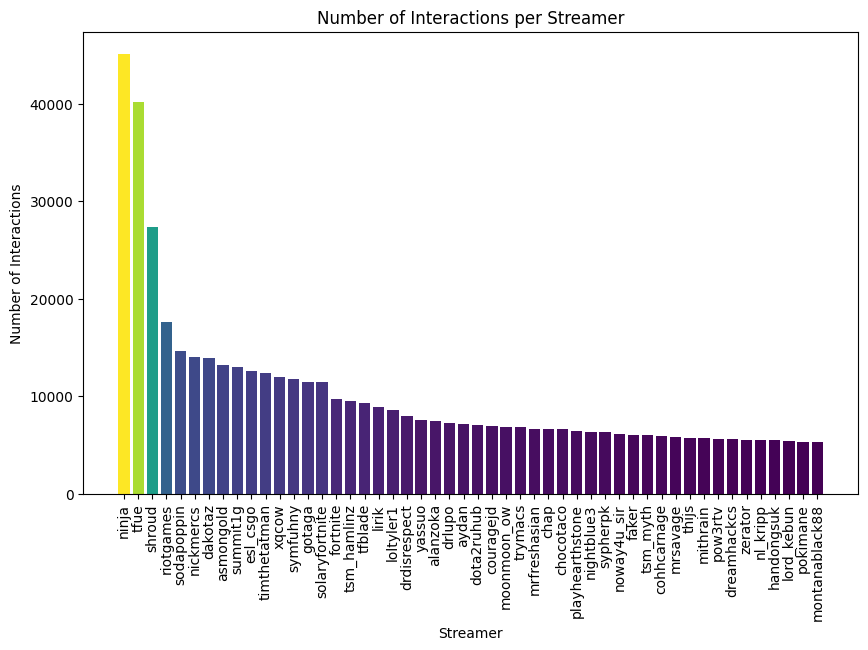

In [15]:
# Calculate the number of interactions per streamer
streamer_interactions = data['Streamer username'].value_counts()

# Get the top 50 streamers with the most interactions for better visualization
top_streamers = streamer_interactions[:50]

# Get colormap
cmap = cm.get_cmap('viridis')

# Normalize counts to range [0, 1] for colormap
norm = plt.Normalize(top_streamers.min(), top_streamers.max())

# Plot a bar chart with color intensity corresponding to the number of interactions
plt.figure(figsize=(10, 6))
plt.bar(top_streamers.index, top_streamers, color=cmap(norm(top_streamers.values)))
plt.title('Number of Interactions per Streamer')
plt.xlabel('Streamer')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

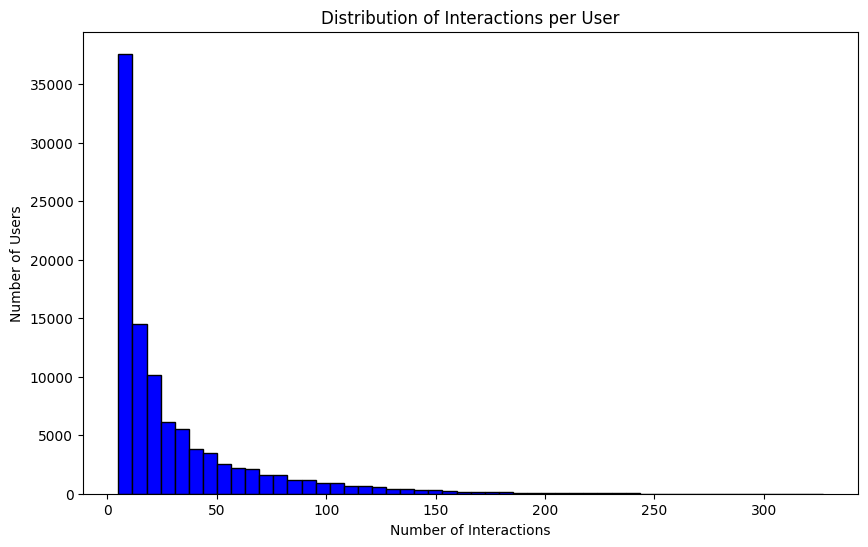

In [16]:
# Visualize the number of interactions per user
user_interactions = data['User ID'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

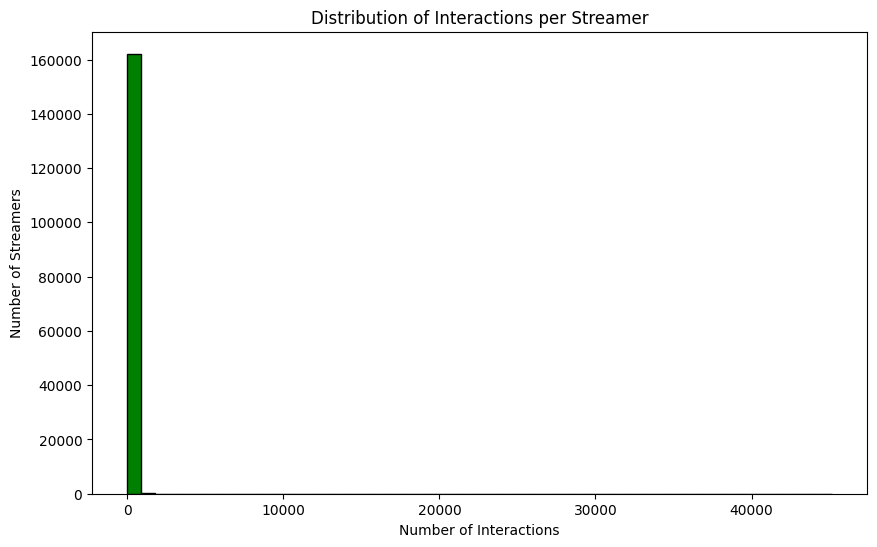

In [17]:
# Visualize the number of interactions per streamer
streamer_interactions = data['Streamer username'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(streamer_interactions, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Interactions per Streamer')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Streamers')
plt.show()

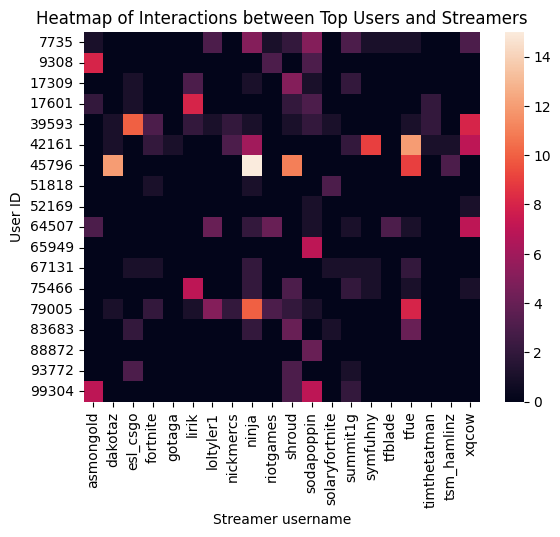

In [18]:
# Select top N users and streamers based on number of interactions
N = 20
top_users = data['User ID'].value_counts().index[:N]
top_streamers = data['Streamer username'].value_counts().index[:N]

# Create a subset of the data with only the top users and streamers
subset = data[data['User ID'].isin(top_users) & data['Streamer username'].isin(top_streamers)]

# Create a pivot table with users as rows and streamers as columns
pivot_table = subset.pivot_table(index='User ID', columns='Streamer username', aggfunc='size', fill_value=0)

# Create a heatmap
sns.heatmap(pivot_table)
plt.title('Heatmap of Interactions between Top Users and Streamers')
plt.show()

In [ ]:
#question2

In [ ]:
# Convert 'Time start' and 'Time stop' to actual time in hours
data['Time start'] = (data['Time start'] * 10) / 60
data['Time stop'] = (data['Time stop'] * 10) / 60

# Extract the hour of the day when each interaction started
data['start_hour'] = data['Time start'] % 24

data['active'] = (data['start_hour'] >= 18) & (data['start_hour'] <= 23)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['User ID', 'Stream ID', 'start_hour']], data['active'], test_size=0.2, random_state=42)

In [ ]:
# Train the model
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


In [ ]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# Convert 'active' to int
data['active'] = data['active'].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['User ID', 'Stream ID', 'start_hour']], data['active'], test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {mse}')